In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from word2number import w2n

In [2]:
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\TrademilPurchase_EDA\CardioGoodFitness.csv")

## Data Profiling

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
df['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

## Data Cleaning

In [9]:
df.isnull()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [11]:
grp=df.groupby([df.Product])
grp

In [12]:
grp.min()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,18,Female,12,Partnered,2,1,29562,38
TM498,19,Female,12,Partnered,2,1,31836,21
TM798,22,Female,14,Partnered,3,3,48556,80


In [13]:
grp.max()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,50,Male,18,Single,5,5,68220,188
TM498,48,Male,18,Single,5,4,67083,212
TM798,48,Male,21,Single,7,5,104581,360


Model 'TM195' has the maximum customer age of 50 ; also the lowest among the maximum miles run.
Model 'TM798'has the highest values of observations in Education and Income of the customers ; also highest usage/week along with the miles run and fitness score

## Exploratory Data Analysis

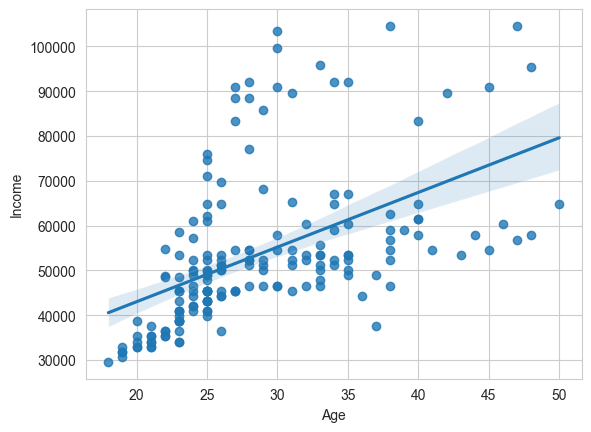

In [15]:
sns.set_style('whitegrid')
sns.regplot(data=df,x='Age',y='Income')
plt.show()

Above graph, Shows the LinearRegression relation between Age & Income

### Univariate Analysis of Categorical Data

<Axes: xlabel='Product', ylabel='count'>

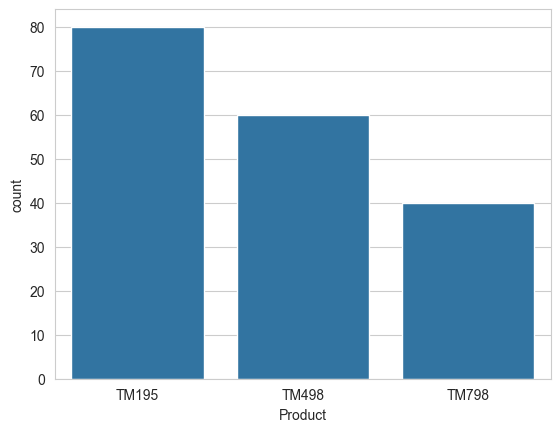

In [16]:
sns.countplot(data=df,x='Product')

The Above graph shows that Prroduct TM195 have the maximum count as compared to TM498 & TM798

<Axes: xlabel='Gender', ylabel='count'>

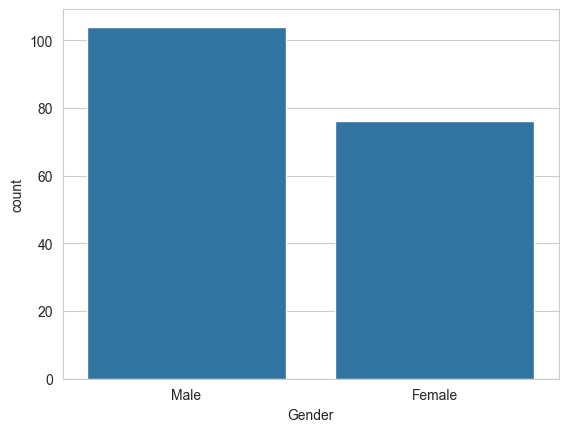

In [17]:
sns.countplot(data=df,x='Gender')

The graph shows that the more number of males have the Trademill products as compared to female.

<Axes: xlabel='MaritalStatus', ylabel='count'>

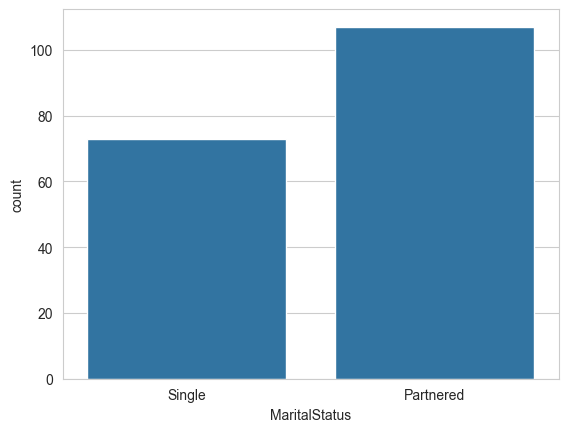

In [18]:
sns.countplot(data=df,x='MaritalStatus')

The graph shows that there are more number partnered couples.

### Bivariate Analysis of Numerical Data

<Axes: xlabel='Age', ylabel='Usage'>

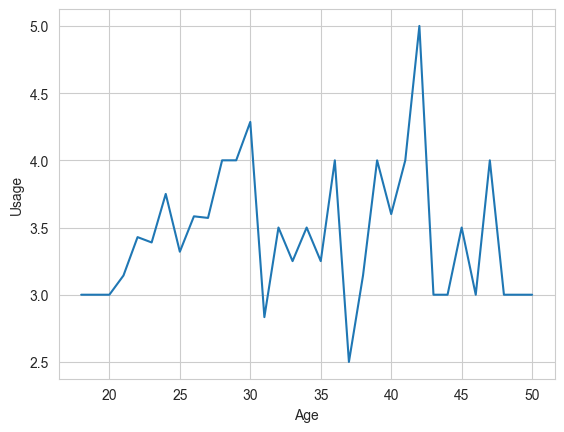

In [22]:
sns.lineplot(x = 'Age', y = 'Usage', data = df, errorbar = None)

Customers of age 40 to 43 years, have the maximum usage per week
There is a steep drop in the usage by customers in their late 30s, after which the average usage per week gradually increases.
Customers in their mid 40's use the treadmill for 3 to 4 days per week
Whereas customers in their late 40's to 50's use the treadmill consistently for 3 days/week only.
Overall age does not seem to drastically affect the use of the treadmill.

<Axes: xlabel='Age', ylabel='Fitness'>

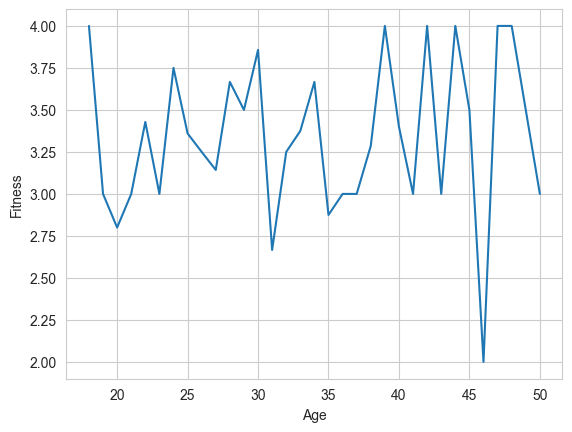

In [23]:
sns.lineplot(x = 'Age', y = 'Fitness', data = df, errorbar = None)

Customers about 45-46 years of age have the lowest fitness rating
We can also see a drop in fitness level rating by customers in their early 30's
4 rating is common among the customers of age 47-48

<Axes: xlabel='Income', ylabel='Miles'>

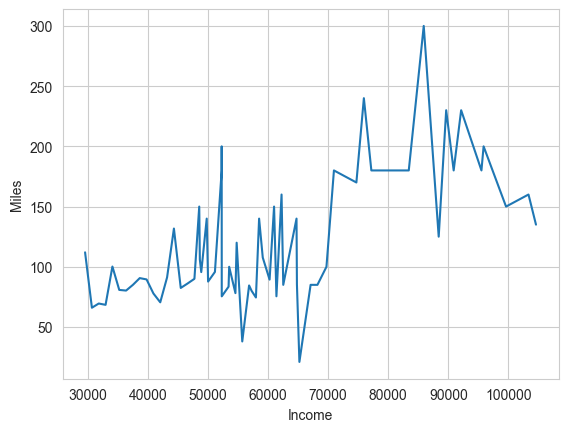

In [24]:
sns.lineplot(x = 'Income', y = 'Miles', data = df, errorbar = None)

Customers with an average annual income more the 70k seem to run miles ranging anywhere between 120 and 300 miles
Whereas the average number of miles run/week by customers under 70k income is 150 miles and the highest is 200 miles

### Bivariate Analysis of Categorical Data

<Axes: xlabel='Product', ylabel='Count'>

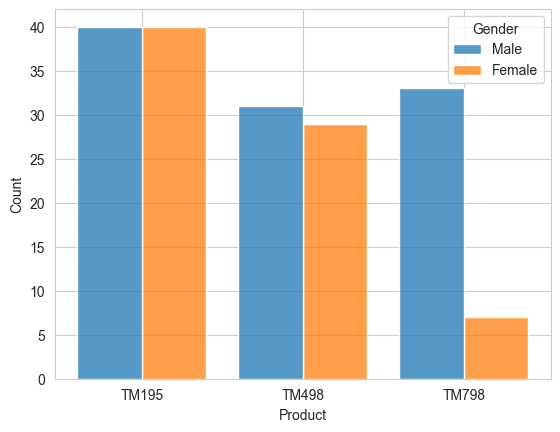

In [25]:
sns.histplot(data=df,x='Product',hue='Gender',multiple='dodge',shrink=.8)

'TM195' is equally preferred by both genders.
There is a very little difference between genders choosing 'TM498'.
'TM798' seems to be highly preferred by Male customers comparatively.

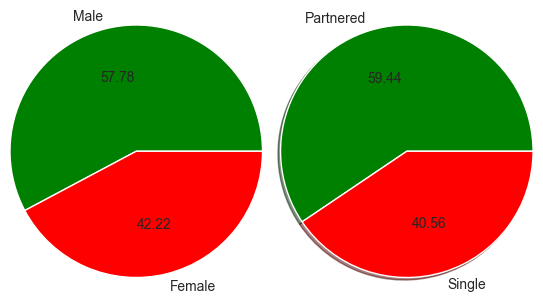

In [26]:
marital = df.MaritalStatus.value_counts()
gender = df.Gender.value_counts()

fig, axs = plt.subplots(1, 2)
axs[0].pie(data=gender, x=gender.values, labels=gender.index, radius=1.4, colors=['green', 'red'],autopct='%.2f')
axs[1].pie(data=marital, x=marital.values, labels=marital.index, radius=1.4,\
           autopct='%.2f', shadow=True, colors=['green', 'red'])
plt.show()

Married or unmarried, Male customer's out number in both cases.

<Axes: xlabel='Product', ylabel='Count'>

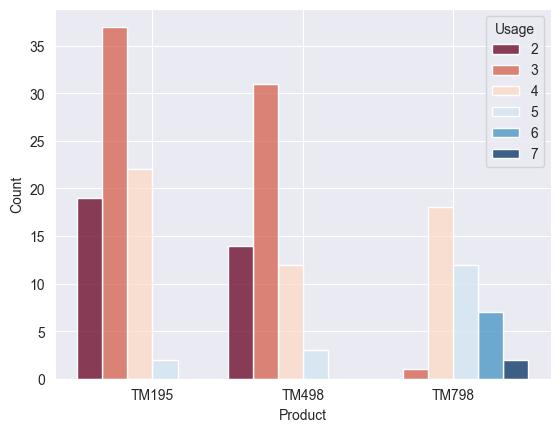

In [27]:
sns.set_style('darkgrid')
sns.histplot(data=df,x='Product',hue='Usage',multiple='dodge', palette='RdBu')

TM195 has the maximum no of usage of 3 times/day & 37 times/week.
TM498 has the maximum no of usage of 3 times/day & 31 times/week.
TM798 has the maximum no of usage of 4 times/day & 18 times/week.

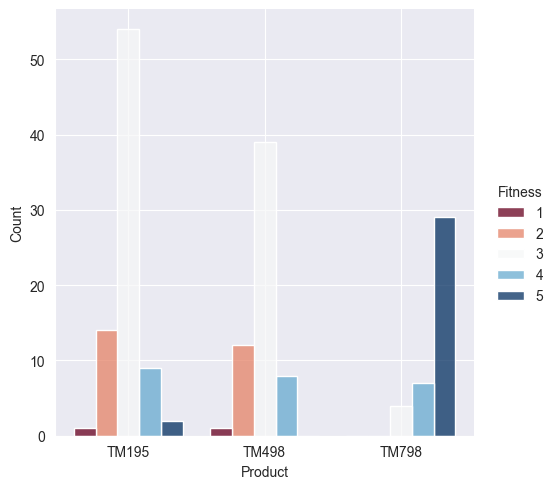

In [28]:
sns.displot(data=df,x='Product',hue='Fitness',multiple='dodge', palette='RdBu',shrink=.8)

TM195 has the maximum fitness of 3, 52 times.  
TM498 has the maximum fitness of 3, 49 times.  
TM798 has the maximum fitness of 5, 28 times.  

<Axes: xlabel='Product', ylabel='Count'>

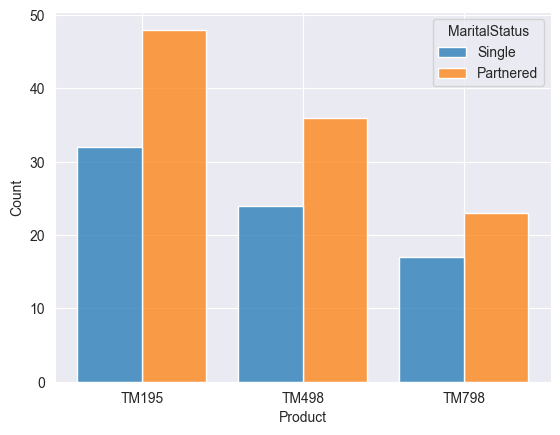

In [29]:
sns.histplot(x='Product',hue='MaritalStatus',multiple='dodge',data=df,binwidth=2,shrink=.8)

In comparison, the number of married customers is more for each model.

### Multivariate analysis

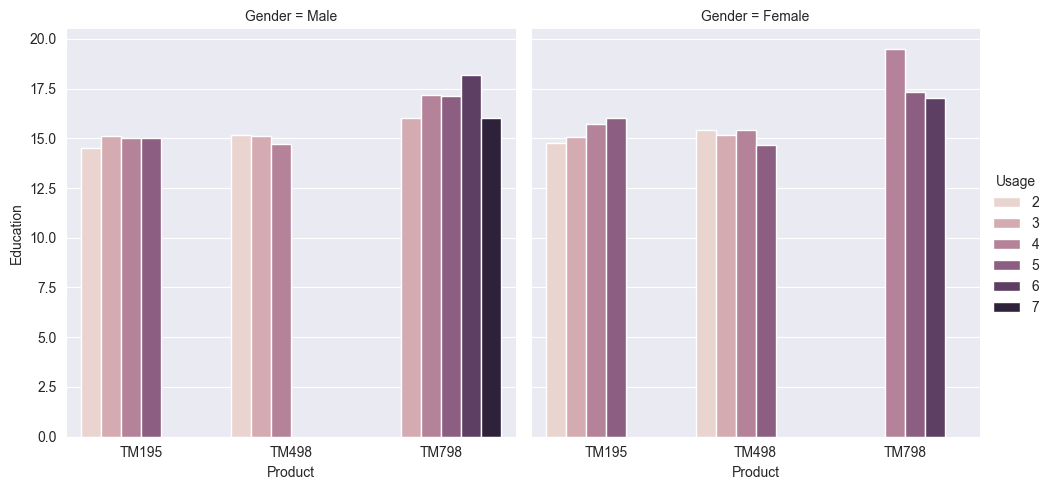

In [30]:
sns.catplot(y = 'Education', hue = 'Usage', data = df, x = 'Product', errorbar = None, col = 'Gender', kind = 'bar') 
# creating a categorical plot arranged in columns based on gender ; 'kind' refers to the type of plot preferred

'TM195'-
Female : Education is 14-16 year ; usage/week ranges between 2-5 days ; maximum days being 5
Male : Education is 14-15 years ; usage/week is 2-5 days ; maximum days being 3-5
'TM498'-
Female : Education is 14-15 years, usage/week ranges between 2-5 days ; maximum days being 2 and 3
Male : Education is 14-15 years, usage/week is 2-4 days ; maximum days being 2 and 3
'TM798'-
Female : Education is 17-18 years, usage/week ranges between 4-6 days ; maximum days being 4
Male : Education is 16-17 years, usage/week is 3-7 days ; maximum days being 6

Insights:
In general, customers with more years of education tend to earn higher.
This in turn indicates that model TM798 could be priced higher than the other models.

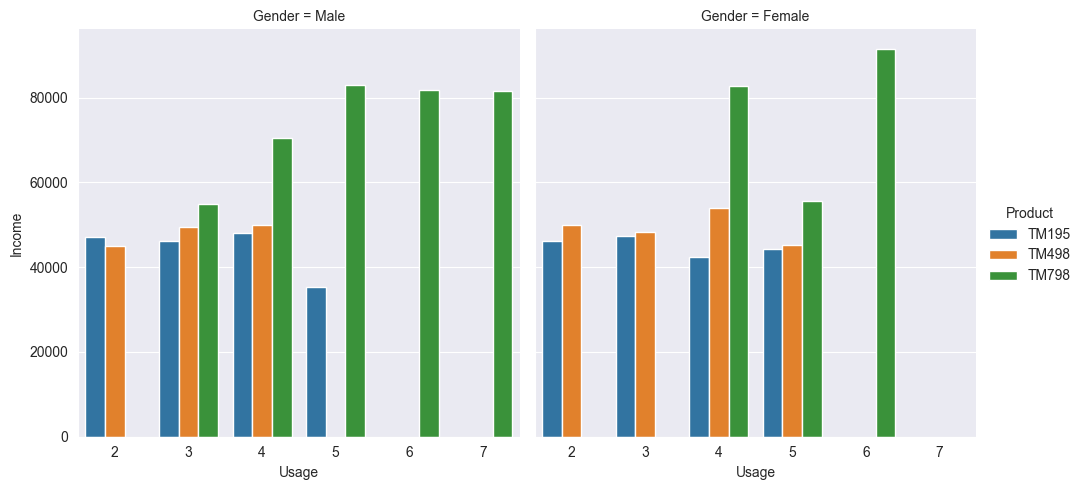

In [31]:
sns.catplot(x = 'Usage', hue = 'Product', y = 'Income', data = df, errorbar = None, col = 'Gender', kind = 'bar')

'TM195'
Female : Average annual income ranges between 42k-44k ; average usage is 2-5 days/week
Male : Average annual income ranges between 37k-42k ; average usage is 2-5 days/week
'TM498'-
Female : Average annual income ranges between 43k-54k ; average usage is 2-5 days/week
Male : Average annual income ranges between 43k-48k ; average usage is 2-4 days/week
'TM798'-
Female : Average annual income ranges between 57k+ -95k+ ; average usage is 4-6 days/week
Male : Average annual income ranges between 57k-82k ; average usage is 3-7 days/week

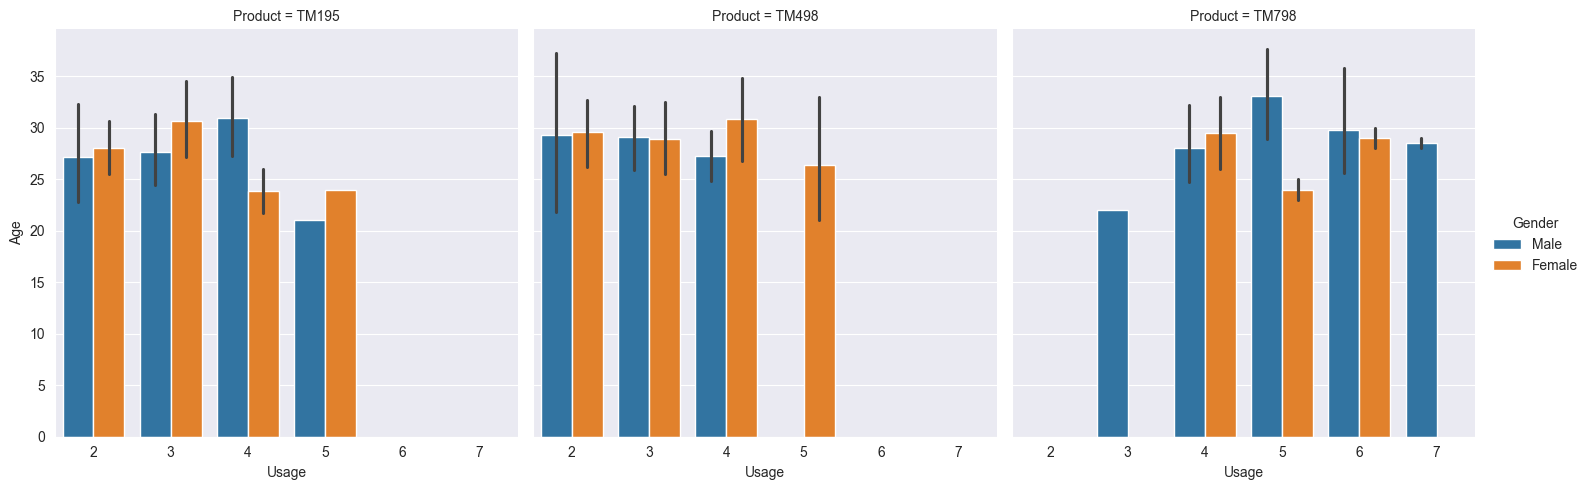

In [32]:
sns.catplot(x = 'Usage', y = 'Age', col = 'Product', data = df, hue = 'Gender', kind = 'bar')

'TM195'-
Usage ranges between 2-5 days/week ; Personal fitness score ranges from 1 to 5
'TM498'-
Usage ranges between 2-5 days/week ; Personal fitness score ranges from 1 to 4
'TM798'-
Usage ranges between 3-7 days/week ; Personal fitness score ranges from 3 to 5

Conclusion: Customer profile based on Model Numbers
'TM195'-
Minimum age of the customers is 18 and the maximum is 50 years
Equally preferred by both male and female customers
Education is 12-18 years
Minimum average annual income is 29.5k
Frequent usage of the produt is 3-4 days/week
Self fitness rating ranges from 1 to 5
'TM498'-
Minimum age of the customers is 19 and the maximum is 48 years
Number of male customers is slightly above the female customers
Education is 12-18 years
Minimum average annual income is 31.8k
Frequent usage of the product is 3 days/week
Self fitness rating ranges from 1 to 4
'TM798'-
Minimum age of the customers is 22 and the maximum is 48 years
Highly preferred by male customers
Education is 14-21 years
Minimum average annual income is 48.5k
Frequent usage of the product is 3 days/week
Self fitness rating ranges from 4 to 5

Insights:
The overall percentage of male customers is greater than female customers.
Model 'TM798' is preferred by customers with an annual income >48k which indicates that this model is highly priced and is not affordable by others.
Higher percentage of the customers are married.
Marital status does not influence the average usage/week.
Usage and miles run per week have a strong correlation.
Customers with an average annual income >70k seem to run the most anywhere between 120 and 300 miles.
Higher usage = Higher personal fitness rating

Note:
Model 'TM798' has the least number of observations in all. This could also be the reason for the values to look higher during comparative analysis.